In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv("../../dataset/data_cleaned.csv", index_col=0)

In [13]:
# split X, y into test and training data
X = data.drop(columns="price")           
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
# split X, y
X = data.drop(columns="price")           
y = data["price"]

In [15]:
# Linear Regression
# simple lr
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score_lr = r2_score(y_test, y_pred)
print(score_lr)

0.6209409681814655


In [16]:
el = ElasticNet(random_state=0)
el.fit(X_train, y_train)
y_pred = el.predict(X_test)
score_el = r2_score(y_test, y_pred)
print(score_el)

0.6160006631913381


In [17]:
# tuning lasso and ridge
lasso_scores = []
ridge_scores = []
for i in range(1, 100, 2):
    lasso = Lasso(alpha=i,max_iter=2000)
    ridge = Ridge(alpha=i)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    y_pred_ridge = ridge.predict(X_test)
    lasso_score = r2_score(y_test, y_pred_lasso)
    ridge_score = r2_score(y_test, y_pred_ridge)
    lasso_scores.append(round(lasso_score, 8))
    ridge_scores.append(round(ridge_score, 8))

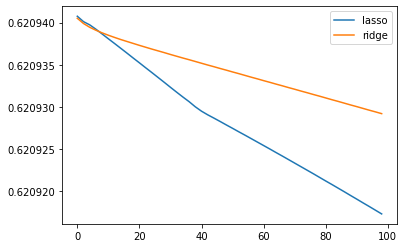

In [18]:
x = range(0, 100, 2)
plt.ticklabel_format(style='plain',useOffset=False, axis='both')
plt.plot(x, lasso_scores, label="lasso")
plt.plot(x, ridge_scores, label="ridge")
plt.legend()
plt.show()

In [19]:
# polynomial regression
lr_scores_poly = []
lasso_scores_poly = []
ridge_scores_poly = []
for i in range(1,4):
    poly = PolynomialFeatures(degree=i)
    poly.fit(X_train)
    X_train_modified = poly.transform(X_train)
    poly.fit(X_test)
    X_test_modified = poly.transform(X_test)

    lr = LinearRegression()
    lasso = Lasso(max_iter=2000)
    ridge = Ridge()
    lr.fit(X_train_modified, y_train)
    lasso.fit(X_train_modified, y_train)
    ridge.fit(X_train_modified, y_train)
    y_pred_lr = lr.predict(X_test_modified)
    y_pred_lasso = lasso.predict(X_test_modified)
    y_pred_ridge = ridge.predict(X_test_modified)
    score_lr = r2_score(y_test, y_pred_lr)
    score_lasso = r2_score(y_test, y_pred_lasso)
    score_ridge = r2_score(y_test, y_pred_ridge)
    print(score_lr, score_lasso, score_ridge)
    lr_scores_poly.append(score_lr)
    lasso_scores_poly.append(score_lasso)
    ridge_scores_poly.append(score_ridge)

0.6209409681816378 0.6209407603617716 0.6209405215579522
0.7912076617453802 0.7912409242724321 0.7912359820314809
0.7981774131778138 0.7995860034573143 0.7798068562808905


In [20]:
print(lr_scores_poly)
print(lasso_scores_poly) 
print(ridge_scores_poly)

[0.6209409681816378, 0.7912076617453802, 0.7981774131778138]
[0.6209407603617716, 0.7912409242724321, 0.7995860034573143]
[0.6209405215579522, 0.7912359820314809, 0.7798068562808905]


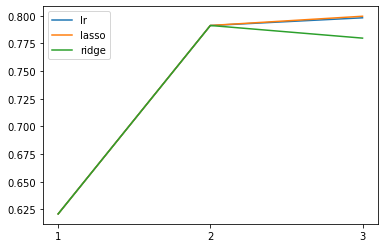

In [21]:
x = range(1,4)
plt.plot(x, lr_scores_poly, label="lr")
plt.plot(x, lasso_scores_poly, label="lasso")
plt.plot(x, ridge_scores_poly, label="ridge")
plt.xticks(x)
plt.legend()
plt.show()